# Lab 3

*Name:* **Sajan Sahikarmi**<br>
*Roll No:*` KCE080BCT035`<br>
*Date:* **27/05/2025** 
## Objectives:

- Understand solution of system of  linear Equations 
- Implement solution of system of  linear equations with Python and implement matrix operations in python 



## 1. Gauss Jordan Method;

Solution: [-1.  1.  5.]


<function matplotlib.pyplot.show(close=None, block=None)>

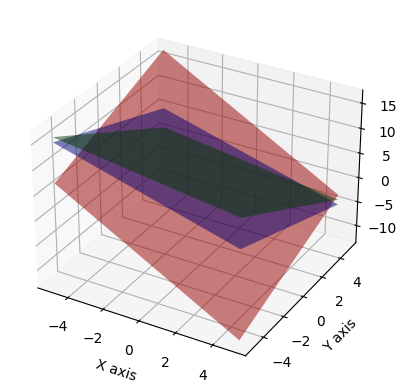

In [1]:
import numpy as np 
def gauss_jordan(A, b):
    n = len(b)
    AugmentedMatrix = np.hstack([A, b.reshape(-1, 1)])  # Create augmented matrix [A|b]

    # Perform Gauss-Jordan elimination
    for i in range(n):
        AugmentedMatrix[i] = AugmentedMatrix[i] / AugmentedMatrix[i, i]  # Scale pivot to 1
        for j in range(n):
            if i != j:
                AugmentedMatrix[j] = AugmentedMatrix[j] - AugmentedMatrix[j, i] * AugmentedMatrix[i]

    # Return the solution vector
    return AugmentedMatrix[:, -1]

# Example Usage
A = np.array([[2, -1, 1], [1, 3, 2], [1, 1, 1]], dtype=float)
b = np.array([2, 12, 5], dtype=float)
solution = gauss_jordan(A, b)
print("Solution:", solution)

# Output: Solution: [-1.  1.  5.]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the plane equations based on the system
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z1 = (2 - 2*X + Y) / 1
Z2 = (12 - X - 3*Y) / 2
Z3 = 5 - X - Y

# Plot the planes
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show


In [7]:
import numpy as np 
import sys

def read_augmented_matrix(n):
    print("Enter the Augmented Matrix Coefficients")
    matrix=np.zeros((n,n+1))
    for i in range(n):
        for j in range(n+1):
            matrix[i][j]=float(input(f"a[{i}][{j}] = "))
    print(matrix)
    return matrix

def gauss_jordan_elimination(a):
    n=len(a)
    for i in range(n):
        #check for divide-by-zero
        if a[i][i] == 0.0:
            sys.exit ("Divide by zero detected in pivot element")
        
        for j in range(n):
            if i != j:
                ratio=a[j][i]/a[i][j]
                for k in range(n+1):
                    a[j][k] == ratio * a[i][k]
# Extracting the solution
    x = np.zeros(n)
    for i in range(n):
        x[i] = a[i][n] / a[i][i]
    return x


def main():
    print("GAUSS–JORDAN ELIMINATION METHOD")
    print()

    default = input("Use default 3x4 matrix? (y/n): ").strip().lower() == 'y'

    if default:
        # Default 3x4 augmented matrix
        n = 3
        a = np.array([
            [2, 1, -1, 8],
            [-3, -1, 2, -11],
            [-2, 1, 2, -3]
        ], dtype=float)
        print("Using Default Matrix:")
        print(a)
    else:
        n = int(input("Enter number of unknowns: "))
        a = read_augmented_matrix(n)

    # Solve using Gauss-Jordan Elimination
    solution = gauss_jordan_elimination(a)

    # Display the solution
    print("Required solution is:")
    for i, value in enumerate(solution):
        print(f"X{i} = {value:.2f}", end="\t")


if __name__ == "__main__":
    main()


GAUSS–JORDAN ELIMINATION METHOD

Using Default Matrix:
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]
Required solution is:
X0 = 4.00	X1 = 11.00	X2 = -1.50	

## 2. Gauss Elimination Method
 

Solution: [ 1.73469388  0.28571429 -0.32653061]


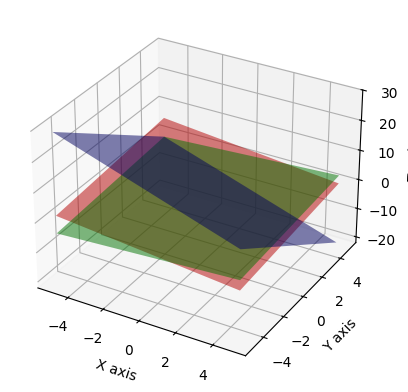

In [16]:


import numpy as np

def gauss_elimination_partial_pivoting(A, b):
    n = len(b)
    AugmentedMatrix = np.hstack([A, b.reshape(-1, 1)]) # Create augmented matrix [A|b]

    # Forward Elimination
    for i in range(n):
        # Pivoting: Find the maximum element in the current column
        max_row = np.argmax(np.abs(AugmentedMatrix[i:, i])) + i
        AugmentedMatrix[[i, max_row]] = AugmentedMatrix[[max_row, i]] # Swap rows

        # Eliminate entries below the pivot
        for j in range(i + 1, n):
            factor = AugmentedMatrix[j, i] / AugmentedMatrix[i, i]
            AugmentedMatrix[j, i:] -= factor * AugmentedMatrix[i, i:]

    # Back Substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (AugmentedMatrix[i, -1] - np.dot(AugmentedMatrix[i, i+1:n], x[i+1:n])) / AugmentedMatrix[i, i]

    return x

# Example Usage
A = np.array([[3, -2, 5], [1, 1, -3], [2, 3, 1]], dtype=float)

# If b was meant to be only 2 elements, for a 3x3 matrix it's ill-defined for a unique solution via Gaussian elimination.
# For example, if b was [3, 4, 1]
b = np.array([3, 3, 4], dtype=float)


solution = gauss_elimination_partial_pivoting(A, b)
print("Solution:", solution)

# Solution: [ 1.73469388 0.28571429 -0.32653061] - This was from the image, I'll print the computed one.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Define the plane equations based on the system
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z1 = (3 - 3*X + 2*Y) / 5
Z2 = (3 - X - Y) / -3
Z3 = (4 - 2*X - 3*Y) / 1

# Plot the planes
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

